In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
big_df = pd.read_csv('38,102,104, 84.csv')

In [2]:
big_df.columns

Index(['circuit_uuid', 'exp_id', 'run_uuid', 'chip_id', 'chip_ver', 'chip_idx',
       'cir_idx', 'cir_ver', 'cir_vers', 'overall_idx', 'curated',
       'media_conc', 'dry', 'antibiotic', 'atc_code', 'sample_type',
       'contrival', 'sample_prep', 'sample_prep_ver', 'specimen', 'strain_id',
       'strain_conc', 'txid', 'fatal', 'nonfatal', 'intv', 'reaction',
       'fill_type', 'fill_ver', 'operator', 'started', 'instrument', 'run_id',
       'imported', 'date', 'antibiotic_conc', 'cir_col', 'cir_row', 'cir_side',
       'test_module', 'position', 'doublets', 'excluded', 'fill_factor_final',
       'fill_factor_initial', 'included', 'neg', 'neg_0', 'neg_1', 'pos_0',
       'pos_0_inc', 'pos_1', 'pos_1_inc', 'total_droplets'],
      dtype='object')

In [3]:
smallish_df = big_df[['specimen','reaction','fill_factor_final','fill_factor_initial','doublets','total_droplets']]
smallish_df['fill_factor_ratio'] = smallish_df['fill_factor_final'] / smallish_df['fill_factor_initial']
smallish_df['fill_factor_score'] = abs(1 - smallish_df['fill_factor_ratio'])
smallish_df.head()

C:\Users\audre\AppData\Local\Temp\ipykernel_11360\222580746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallish_df['fill_factor_ratio'] = smallish_df['fill_factor_final'] / smallish_df['fill_factor_initial']
C:\Users\audre\AppData\Local\Temp\ipykernel_11360\222580746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallish_df['fill_factor_score'] = abs(1 - smallish_df['fill_factor_ratio'])


,specimen,reaction,fill_factor_final,fill_factor_initial,doublets,total_droplets,fill_factor_ratio,fill_factor_score
0,LR-S007-0528,NK-R38,1.0,1.0,57,23135,1.0,0.0
1,LR-S007-0528,NK-R38,1.0,1.0,48,22031,1.0,0.0
2,LR-S007-0528,NK-R38,1.0,1.0,34,24168,1.0,0.0
3,LR-S007-0528,NK-R38,1.0,1.0,42,21581,1.0,0.0
4,LR-S007-0528,NK-R38,1.0,1.0,51,23102,1.0,0.0


- R102 and R104 come from the same lot (different bottles)
- Variance is accounted for by imperfections in manufacturing
- R38 is really great, but that lot is sold out
- R84 is adequate, but barely.

In [4]:
# In this cell, I'm making a dataframe to plot data regarding doublets.

r38_df = smallish_df[smallish_df['reaction'] == 'NK-R38']
r84_df = smallish_df[smallish_df['reaction'] == 'NK-R84']
r102_df = smallish_df[smallish_df['reaction'] == 'NK-R102']
r104_df = smallish_df[smallish_df['reaction'] == 'NK-R104']

group38 = r38_df.groupby('specimen')
group84 = r84_df.groupby('specimen')
group102 = r102_df.groupby('specimen')
group104 = r104_df.groupby('specimen')

doublets38_df = pd.DataFrame(group38.mean(numeric_only=True)['doublets'])
doublets84_df = pd.DataFrame(group84.mean(numeric_only=True)['doublets'])
doublets102_df = pd.DataFrame(group102.mean(numeric_only=True)['doublets'])
doublets104_df = pd.DataFrame(group104.mean(numeric_only=True)['doublets'])

merge1 = pd.merge(doublets38_df,doublets84_df,how='inner',on='specimen',suffixes=['_38','_84'])
merge2 = pd.merge(doublets102_df,doublets104_df,how='inner',on='specimen',suffixes=['_102','_104'])
doublets_df = pd.merge(merge1,merge2,how='inner',on='specimen')
doublets_df.rename(axis=1,mapper={'doublets_38':'NK-R38','doublets_84':'NK-R84',\
                                  'doublets_102':'NK-R102','doublets_104':'NK-R104'},inplace=True)

doublets_df.head()


,NK-R38,NK-R84,NK-R102,NK-R104
specimen,,,,
LR-S002-1321,33.400000,35.0,33.8,30.2
LR-S003-0259,59.200000,112.7,35.3,46.0
LR-S003-0261,100.900000,131.8,93.8,110.9
LR-S007-0523,43.666667,52.8,48.6,39.5
LR-S007-0524,41.000000,85.1,47.6,39.8


Text(0.5, 1.0, 'Average Doublet Counts for Four Surfactants')

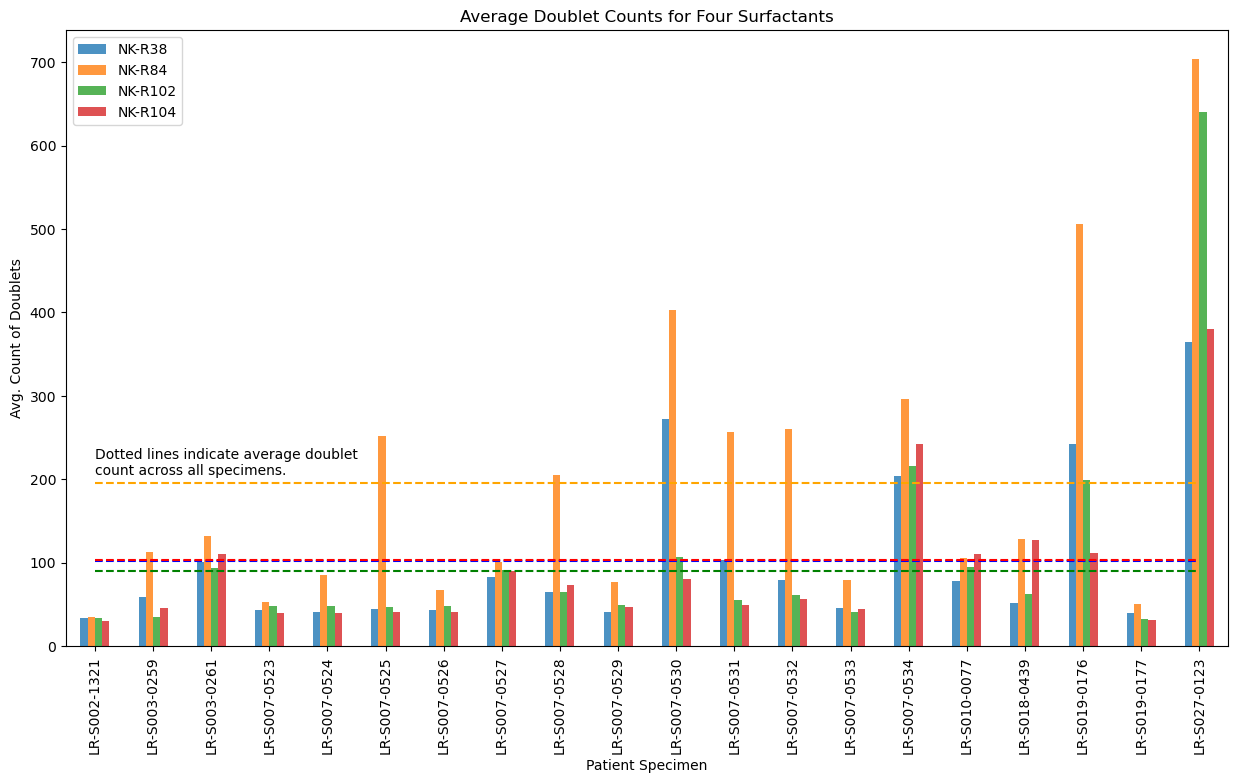

In [5]:
# This cell is the code to plot the above dataframe on a bar chart.

doublets_df.plot(kind='bar',figsize=(15,8),\
                 ylabel='Avg. Count of Doublets',xlabel='Patient Specimen',alpha=0.8)
plt.hlines(doublets_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(doublets_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.hlines(doublets_df['NK-R104'].mean(),0,19,colors='green',linestyles='--')
plt.hlines(doublets_df['NK-R102'].mean(),0,19,colors='red',linestyles='--')
plt.annotate('Dotted lines indicate average doublet \ncount across all specimens.',(0,205))
plt.title('Average Doublet Counts for Four Surfactants')

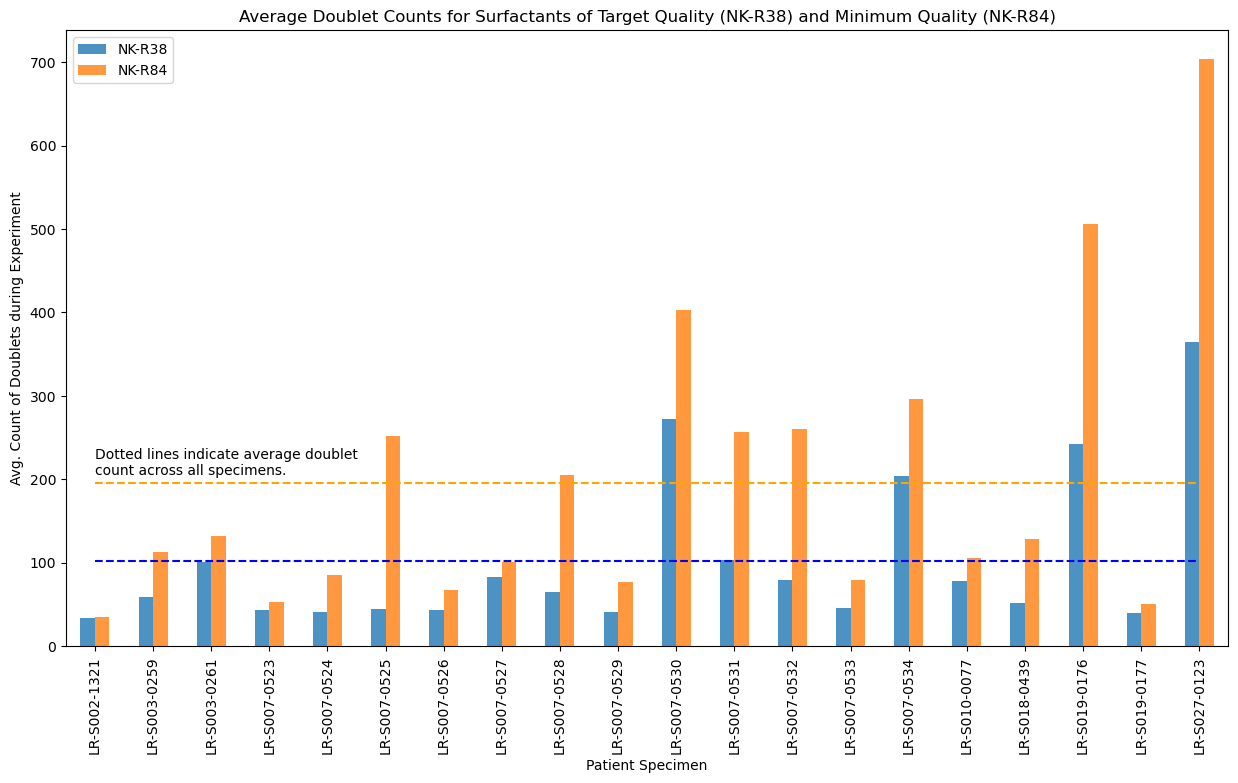

In [25]:
# This cell is the same bar chart, but only for NK-R38 and NK-R84. I think of it as the 'before'
# data. These are the two surfactants we're looking at to establish the range where we want our
# possible next surfactants to be.
doublets_df.plot(y=['NK-R38','NK-R84'],kind='bar',figsize=(15,8),\
                 ylabel='Avg. Count of Doublets during Experiment',xlabel='Patient Specimen',\
                    alpha=0.8)
plt.hlines(doublets_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(doublets_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.title('Average Doublet Counts for Surfactants of Target Quality (NK-R38) and Minimum Quality (NK-R84)')
plt.annotate('Dotted lines indicate average doublet \ncount across all specimens.',(0,205))
plt.show()

In [7]:
totdrop38_df = pd.DataFrame(group38.mean(numeric_only=True)['total_droplets'])
totdrop84_df = pd.DataFrame(group84.mean(numeric_only=True)['total_droplets'])
totdrop102_df = pd.DataFrame(group102.mean(numeric_only=True)['total_droplets'])
totdrop104 = pd.DataFrame(group104.mean(numeric_only=True)['total_droplets'])

# Note that I'm reusing the names merge1 and merge2, since they're intermediate anyway.
merge1 = pd.merge(totdrop38_df,totdrop84_df,how='inner',on='specimen',suffixes=['_38','_84'])
merge2 = pd.merge(totdrop102_df,totdrop104,how='inner',on='specimen',suffixes=['_102','_104'])
total_droplets_df = pd.merge(merge1,merge2,how='inner',on='specimen')
total_droplets_df.rename(axis=1,mapper={'total_droplets_38':'NK-R38','total_droplets_84':'NK-R84',\
                                  'total_droplets_102':'NK-R102','total_droplets_104':'NK-R104'},\
                                    inplace=True)

total_droplets_df.head()


,NK-R38,NK-R84,NK-R102,NK-R104
specimen,,,,
LR-S002-1321,23575.8,22092.8,22544.0,22357.2
LR-S003-0259,23414.0,21906.2,22913.7,22184.3
LR-S003-0261,23729.0,21754.1,22400.8,21870.1
LR-S007-0523,23314.0,22070.8,22307.0,22408.7
LR-S007-0524,23489.8,22050.1,22684.4,22437.4


Text(0.5, 1.0, 'Average Total Droplet Counts for Four Surfactants')

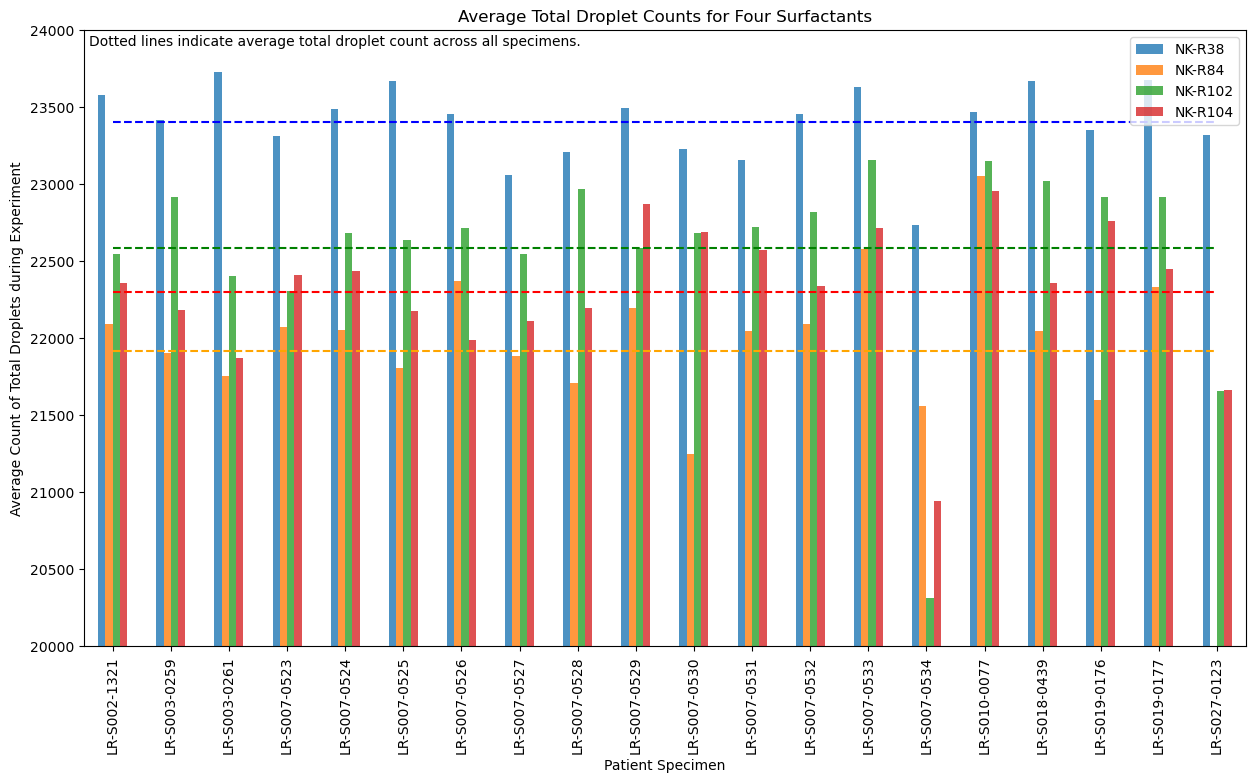

In [8]:
total_droplets_df.plot(kind='bar',figsize=(15,8),ylim=(20000,24000),\
                       ylabel='Average Count of Total Droplets during Experiment',\
                        xlabel='Patient Specimen',alpha=0.8)
plt.hlines(total_droplets_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(total_droplets_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.hlines(total_droplets_df['NK-R102'].mean(),0,19,colors='green',linestyles='--')
plt.hlines(total_droplets_df['NK-R104'].mean(),0,19,colors='red',linestyles='--')
plt.annotate('Dotted lines indicate average total droplet count across all specimens.',(-0.4,23900))
plt.title('Average Total Droplet Counts for Four Surfactants')


Text(0.5, 1.0, 'Average Total Droplet Counts for Surfactants of Target Quality (NK-R38) and Minimum Quality (NK-R84)')

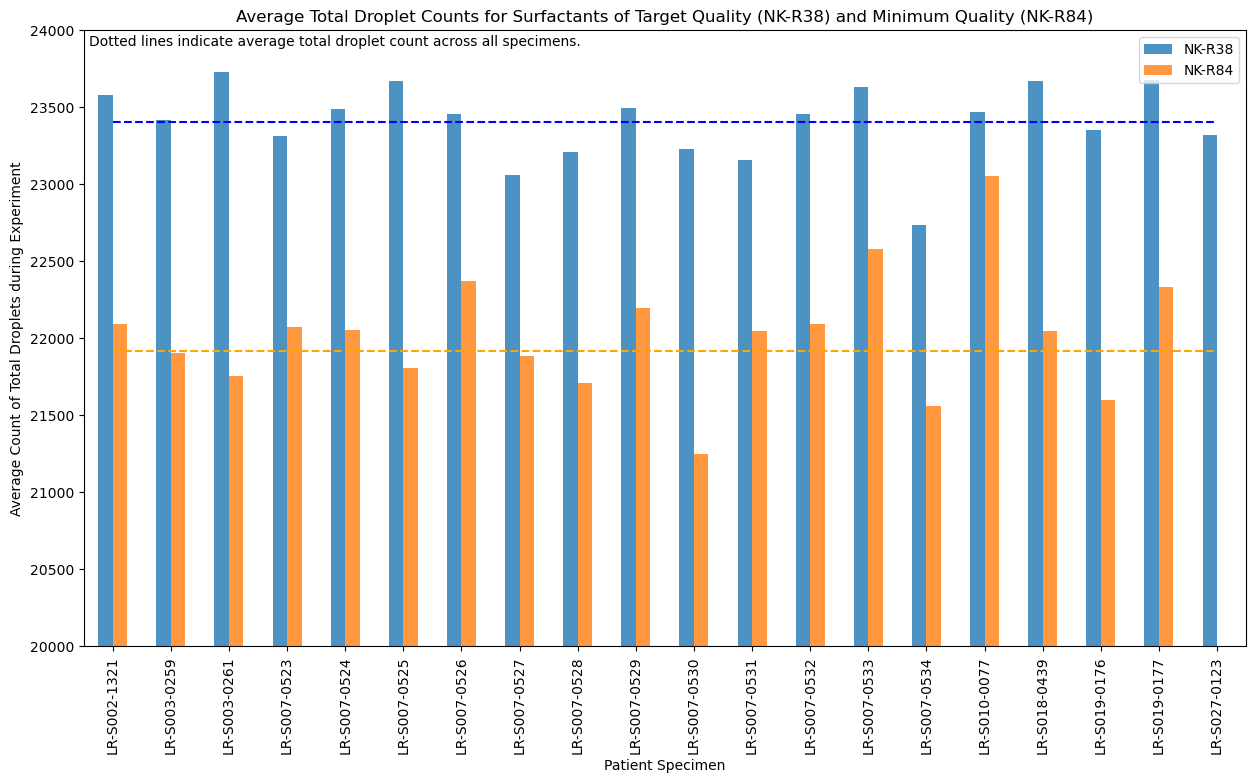

In [9]:
# This cell is the same bar chart, but only for NK-R38 and NK-R84. I think of it as the 'before'
# data. These are the two surfactants we're looking at to establish the range where we want our
# possible next surfactants to be. 
total_droplets_df.plot(y=['NK-R38','NK-R84'],kind='bar',figsize=(15,8),ylim=(20000,24000),\
                       ylabel='Average Count of Total Droplets during Experiment',\
                        xlabel='Patient Specimen',alpha=0.8)
plt.hlines(total_droplets_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(total_droplets_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.annotate('Dotted lines indicate average total droplet count across all specimens.',(-0.4,23900))
plt.legend(loc='upper right')
plt.title('Average Total Droplet Counts for Surfactants of Target Quality (NK-R38) and Minimum Quality (NK-R84)')

In [10]:
ffratio38_df = pd.DataFrame(group38.mean(numeric_only=True)['fill_factor_ratio'])
ffratio84_df = pd.DataFrame(group84.mean(numeric_only=True)['fill_factor_ratio'])
ffratio102_df = pd.DataFrame(group102.mean(numeric_only=True)['fill_factor_ratio'])
ffratio104_df = pd.DataFrame(group104.mean(numeric_only=True)['fill_factor_ratio'])

# Note that I'm reusing the names merge1 and merge2, since they're intermediate anyway.
merge1 = pd.merge(ffratio38_df,ffratio84_df,how='inner',on='specimen',suffixes=['_38','_84'])
merge2 = pd.merge(ffratio102_df,ffratio104_df,how='inner',on='specimen',suffixes=['_102','_104'])
ffratio_df = pd.merge(merge1,merge2,how='inner',on='specimen')
ffratio_df.rename(axis=1,mapper={'fill_factor_ratio_38':'NK-R38','fill_factor_ratio_84':'NK-R84',\
                                  'fill_factor_ratio_102':'NK-R102','fill_factor_ratio_104':'NK-R104'},\
                                    inplace=True)

ffratio_df.head()

,NK-R38,NK-R84,NK-R102,NK-R104
specimen,,,,
LR-S002-1321,0.998000,0.99500,0.999,1.00101
LR-S003-0259,1.001020,1.00001,0.998,1.00001
LR-S003-0261,1.000010,1.00101,1.000,0.99800
LR-S007-0523,1.000011,1.00303,1.000,1.00000
LR-S007-0524,1.003030,0.99799,1.000,1.00101


Text(0.5, 1.0, 'Average Fill Factor Ratio for Four Surfactants')

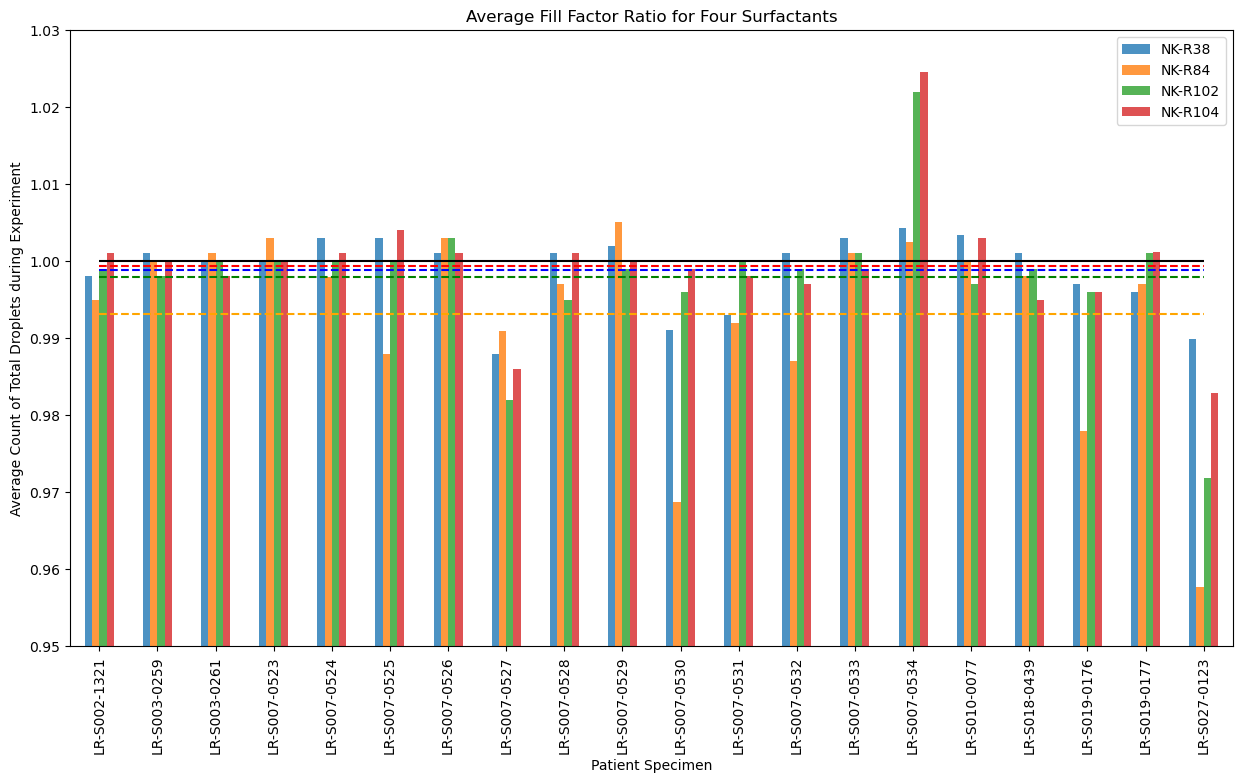

In [11]:
ffratio_df.plot(kind='bar',figsize=(15,8),ylim=(0.95,1.03),\
                       ylabel='Average Count of Total Droplets during Experiment',\
                        xlabel='Patient Specimen',alpha=0.8)
plt.hlines(1.0,0,19,colors='black')
plt.hlines(ffratio_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(ffratio_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.hlines(ffratio_df['NK-R102'].mean(),0,19,colors='green',linestyles='--')
plt.hlines(ffratio_df['NK-R104'].mean(),0,19,colors='red',linestyles='--')
plt.annotate('Dotted lines indicate average fill factor ratio across all specimens.',(-0.4,1.045))
plt.title('Average Fill Factor Ratio for Four Surfactants')

Text(0.5, 1.0, 'Average Fill Factor Ratio for Surfactants of Target Quality (NK-R38) and Minimum Quality (NK-R84)')

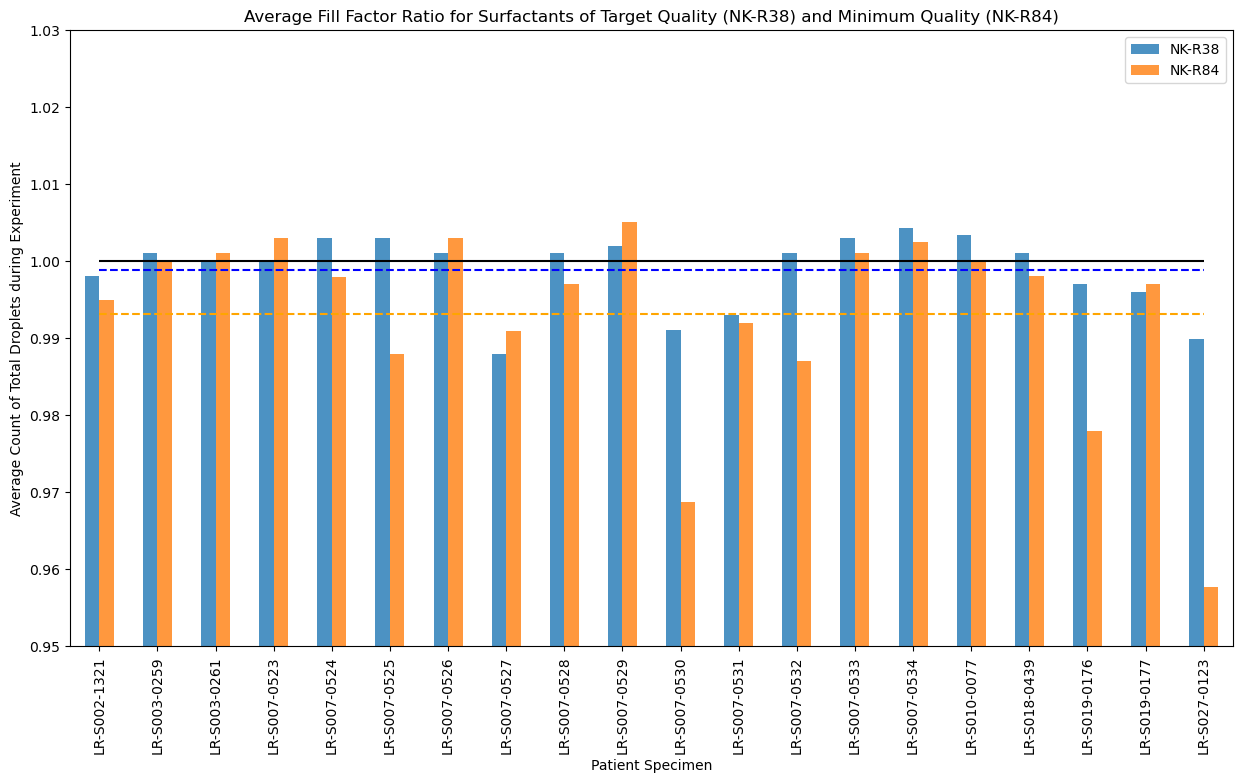

In [12]:
ffratio_df.plot(y=['NK-R38','NK-R84'] ,kind='bar',figsize=(15,8),ylim=(0.95,1.03),\
                       ylabel='Average Count of Total Droplets during Experiment',\
                        xlabel='Patient Specimen',alpha=0.8)
plt.hlines(1.0,0,19,colors='black')
plt.hlines(ffratio_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(ffratio_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.annotate('Dotted lines indicate average fill factor ratio across all specimens.',(-0.4,1.045))
plt.title('Average Fill Factor Ratio for Surfactants of Target Quality (NK-R38) and Minimum Quality (NK-R84)')

In [13]:
ffscore38_df = pd.DataFrame(group38.mean(numeric_only=True)['fill_factor_score'])
ffscore84_df = pd.DataFrame(group84.mean(numeric_only=True)['fill_factor_score'])
ffscore102_df = pd.DataFrame(group102.mean(numeric_only=True)['fill_factor_score'])
ffscore104_df = pd.DataFrame(group104.mean(numeric_only=True)['fill_factor_score'])

# Note that I'm reusing the names merge1 and merge2, since they're intermediate anyway.
merge1 = pd.merge(ffscore38_df,ffscore84_df,how='inner',on='specimen',suffixes=['_38','_84'])
merge2 = pd.merge(ffscore102_df,ffscore104_df,how='inner',on='specimen',suffixes=['_102','_104'])
ffscore_df = pd.merge(merge1,merge2,how='inner',on='specimen')
ffscore_df.rename(axis=1,mapper={'fill_factor_score_38':'NK-R38','fill_factor_score_84':'NK-R84',\
                                  'fill_factor_score_102':'NK-R102','fill_factor_score_104':'NK-R104'},\
                                    inplace=True)

ffscore_df.head()

,NK-R38,NK-R84,NK-R102,NK-R104
specimen,,,,
LR-S002-1321,0.002000,0.00500,0.001,0.00101
LR-S003-0259,0.003020,0.00201,0.002,0.00201
LR-S003-0261,0.002010,0.00101,0.000,0.00200
LR-S007-0523,0.002233,0.00303,0.000,0.00000
LR-S007-0524,0.003030,0.00201,0.000,0.00101


Text(0.5, 1.0, 'Average Fill Factor Score for Four Surfactants')

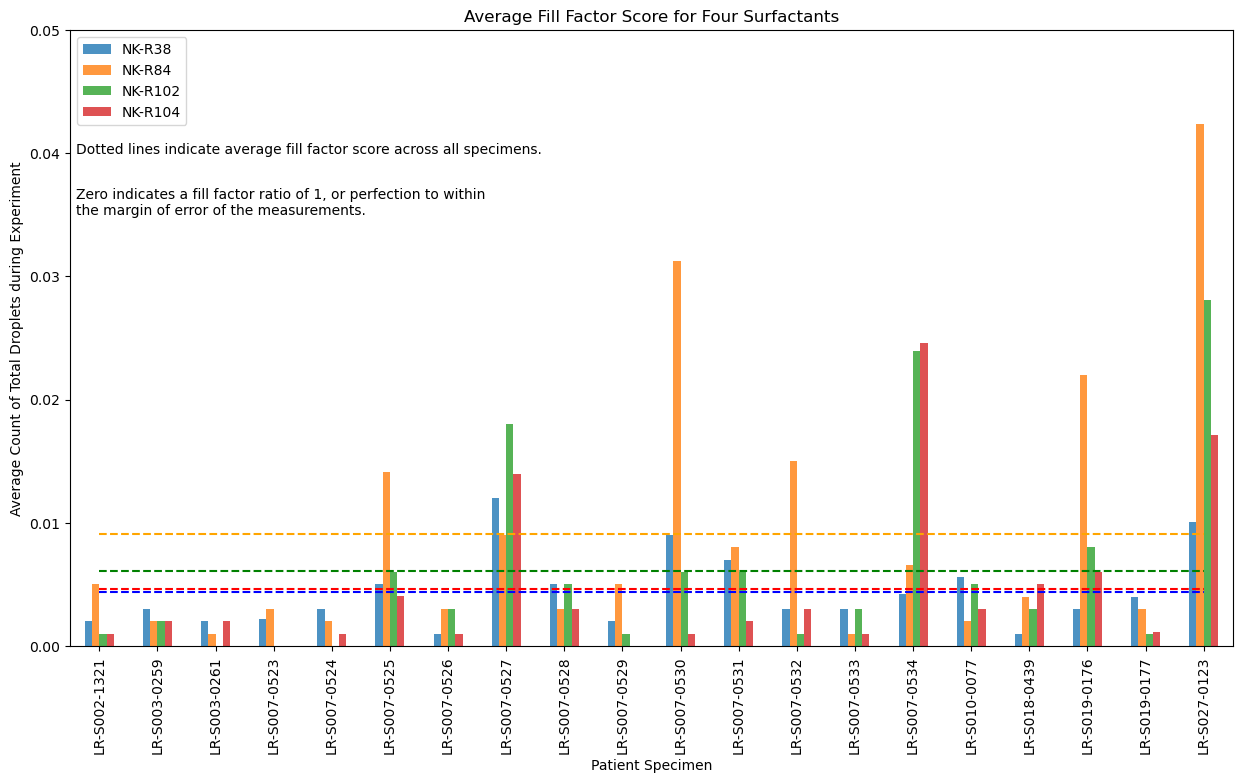

In [21]:
ffscore_df.plot(kind='bar',figsize=(15,8),ylim=(0.0,0.05),\
                       ylabel='Average Count of Total Droplets during Experiment',\
                        xlabel='Patient Specimen',alpha=0.8)
plt.hlines(1.0,0,19,colors='black')
plt.hlines(ffscore_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(ffscore_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.hlines(ffscore_df['NK-R102'].mean(),0,19,colors='green',linestyles='--')
plt.hlines(ffscore_df['NK-R104'].mean(),0,19,colors='red',linestyles='--')
plt.annotate('Dotted lines indicate average fill factor score across all specimens.',(-0.4,0.04))
plt.annotate('Zero indicates a fill factor ratio of 1, or perfection to within\nthe margin of error of the measurements.',(-0.4,0.035))
plt.title('Average Fill Factor Score for Four Surfactants')

Text(0.5, 1.0, 'Average Fill Factor Score for Four Surfactants')

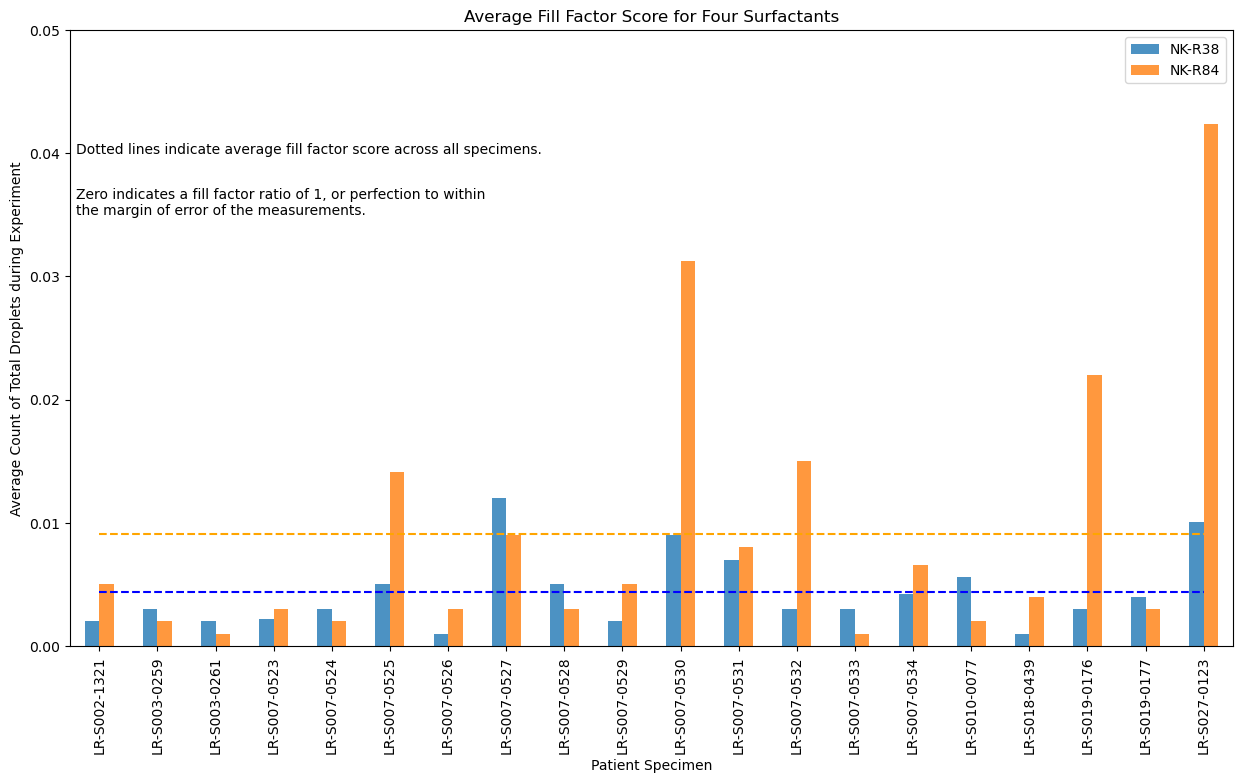

In [26]:
ffscore_df.plot(y=['NK-R38','NK-R84'],kind='bar',figsize=(15,8),ylim=(0.0,0.05),\
                       ylabel='Average Count of Total Droplets during Experiment',\
                        xlabel='Patient Specimen',alpha=0.8)
plt.hlines(1.0,0,19,colors='black')
plt.hlines(ffscore_df['NK-R38'].mean(),0,19,colors='blue',linestyles='--')
plt.hlines(ffscore_df['NK-R84'].mean(),0,19,colors='orange',linestyles='--')
plt.annotate('Dotted lines indicate average fill factor score across all specimens.',(-0.4,0.04))
plt.annotate('Zero indicates a fill factor ratio of 1, or perfection to within\nthe margin of error of the measurements.',(-0.4,0.035))
plt.title('Average Fill Factor Score for Four Surfactants')

In [29]:
# How often did we have a fill factor ratio greater than one?
smallish_df[smallish_df['fill_factor_ratio'] > 1.0].count()

specimen               86
reaction               86
fill_factor_final      86
fill_factor_initial    86
doublets               86
total_droplets         86
fill_factor_ratio      86
fill_factor_score      86
dtype: int64

In [34]:
print(smallish_df.count())
print('--------------------------')
# This last line was written after running the cell the first time.
print(f'{round((86/796) * 100,3)}%')

specimen               796
reaction               796
fill_factor_final      796
fill_factor_initial    796
doublets               796
total_droplets         796
fill_factor_ratio      796
fill_factor_score      796
dtype: int64
--------------------------
10.804%


For this dataset, I recommend that we don't rely on fill factor as a measure. A fill factor ratio greater than one should be impossible. Droplets don't split once they're in the circuit, so the final ratio should never be greater than the initial. However, our measurements indicate that that's the case in more than 10% of the trials. This suggests that measurements of fill factor are not reliable.